In [362]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [363]:
df = pd.read_csv("C:\\Users\\yashs\\OneDrive\\Desktop\\Kaggle\\Patient Charges\\insurance.csv")

#### Info of the data

In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Null values

In [365]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Duplicate rows

In [366]:
df[df.duplicated()==True]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [367]:
##As it is likely that two patients with same BMI and age & other characterisitics are a part of the dataset. So, they will 
#not be deleted

### Describe method

In [368]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338.0,NaN,NaN,NaN,39.207025,14.04996,18.0,27.0,39.0,51.0,64.0
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338.0,NaN,NaN,NaN,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
children,1338.0,NaN,NaN,NaN,1.094918,1.205493,0.0,0.0,1.0,2.0,5.0
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338.0,NaN,NaN,NaN,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### Segregating the continuous and categorical variables


In [369]:
cont = list(df.select_dtypes(include=["int64","float64"]).columns)
cat = list(df.select_dtypes(include=["object"]).columns)

In [370]:
cont

['age', 'bmi', 'children', 'charges']

In [371]:
cat

['sex', 'smoker', 'region']

### Boxplots and Distplots for continuous variables

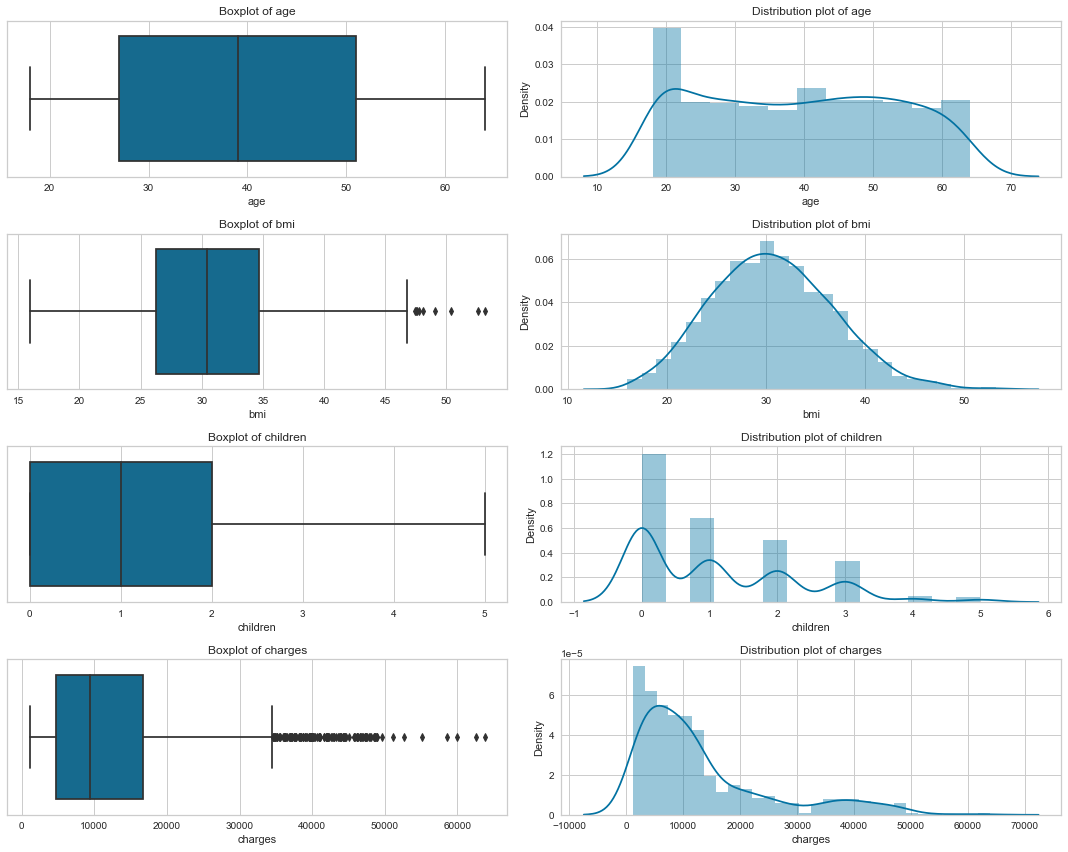

In [372]:
fig,axes = plt.subplots(nrows=4,ncols=2,figsize=(15,12))
m=0
n=0
for i in cont:
    n=0
    sns.boxplot(x=i,data=df,ax=axes[m][n])
    axes[m][n].set_title("Boxplot of "+str(i))
    n+=1
    sns.distplot(df[i],ax=axes[m][n],)
    axes[m][n].set_title("Distribution plot of "+str(i))
    m+=1
plt.tight_layout()

### Countplot for categorical variables

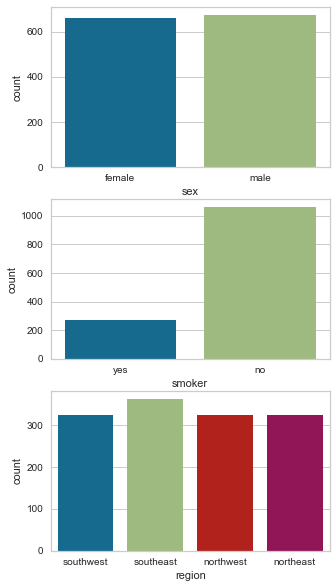

In [373]:
fig,axes=plt.subplots(nrows=len(cat),figsize=(5,10))
m=0
for i in cat:
    sns.countplot(x=df[i],ax=axes[m])
    m+=1

### Clustering process

In [374]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### Dummy variable transformation

In [375]:
dummy_df = pd.get_dummies(data=df,columns=cat,drop_first=True)

In [376]:
cont_df=dummy_df[cont]

In [377]:
cat_df=dummy_df[['sex_male', 'smoker_yes','region_northwest', 'region_southeast', 'region_southwest']]

#### Step #1 - Scaling

In [378]:
from sklearn.preprocessing import StandardScaler

In [379]:
scaled_df = pd.DataFrame(data=StandardScaler().fit_transform(cont_df),columns=cont_df.columns)

In [380]:
scaled_df

,age,bmi,children,charges
0,-1.438764,-0.453320,-0.908614,0.298584
1,-1.509965,0.509621,-0.078767,-0.953689
2,-0.797954,0.383307,1.580926,-0.728675
3,-0.441948,-1.305531,-0.908614,0.719843
4,-0.513149,-0.292556,-0.908614,-0.776802
...,...,...,...,...
1333,0.768473,0.050297,1.580926,-0.220551
1334,-1.509965,0.206139,-0.908614,-0.914002
1335,-1.509965,1.014878,-0.908614,-0.961596
1336,-1.296362,-0.797813,-0.908614,-0.930362


In [381]:
data = pd.concat([scaled_df,cat_df],axis=1)

### Hierarchical Clustering

In [382]:
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster

In [383]:
ward = linkage(data,method='ward',metric="euclidean")

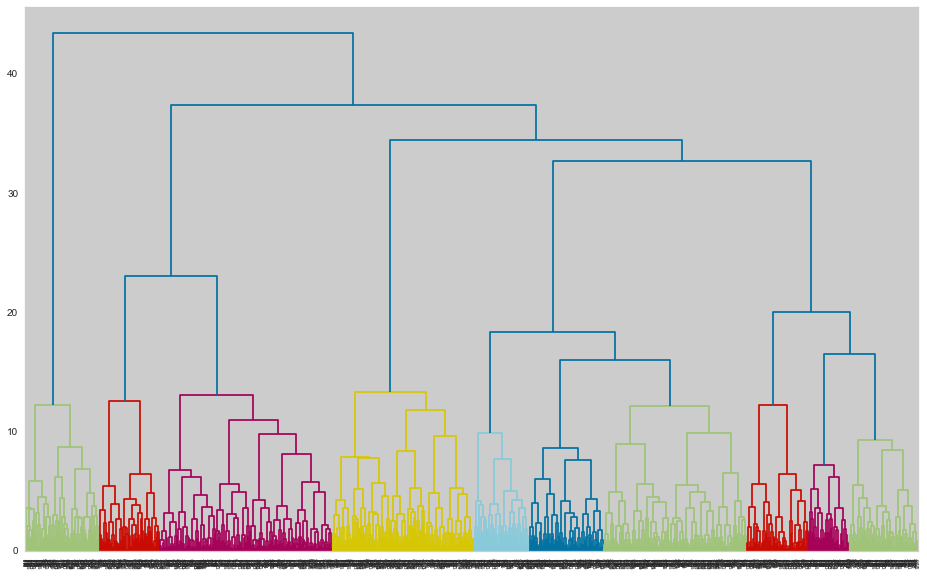

In [384]:
plt.figure(figsize=(16,10))
dend = dendrogram(ward,color_threshold=15)

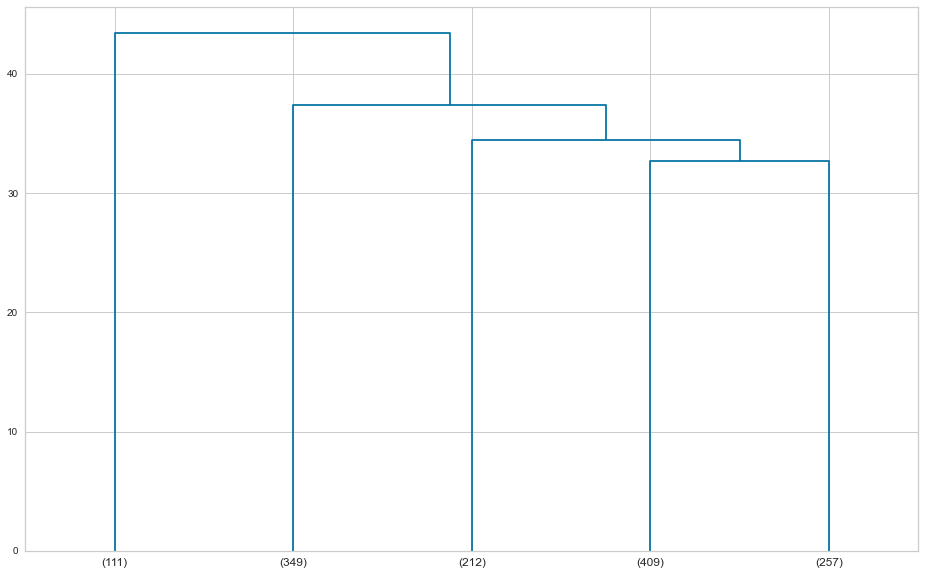

In [385]:
plt.figure(figsize=(16,10))
dend = dendrogram(ward,color_threshold=15,p=5,truncate_mode="lastp")

#### Choosing 5 clusters which was derived when color_threshold parameter was kept none

In [386]:
clusters_agg = fcluster(ward,5,criterion="maxclust")
clusters_agg

array([2, 2, 5, ..., 5, 2, 4], dtype=int32)

In [387]:
df["Clusters"]=clusters_agg

In [388]:
from scipy.stats import mode

In [389]:
df.groupby("Clusters").agg({"charges":"mean","region":mode,"smoker":mode,"children":"mean","sex":mode,"age":"mean","Clusters":"count"})

,charges,region,smoker,children,sex,age,Clusters
Clusters,,,,,,,
1,43461.036075,"([southeast], [46])","([yes], [111])",1.378378,"([male], [70])",43.747748,111
2,8797.917690,"([southwest], [113])","([no], [275])",0.358166,"([female], [192])",25.040115,349
3,9288.143895,"([southwest], [74])","([no], [194])",2.830189,"([male], [116])",35.419811,212
4,13424.939702,"([northwest], [132])","([no], [338])",0.777506,"([male], [205])",49.814181,409
5,9343.540345,"([southeast], [139])","([no], [257])",1.046693,"([female], [129])",42.727626,257


In [390]:
for i in range(1,6,1):
    print(df.loc[df["Clusters"]==i].groupby("sex").agg({"charges":"mean","age":"mean"}))
    print("---")

             charges        age
sex                            
female  44147.740235  43.731707
male    43058.823638  43.757143
---
             charges        age
sex                            
female   7575.113553  25.765625
male    10293.321477  24.152866
---
             charges        age
sex                            
female  10076.524214  36.218750
male     8635.691217  34.758621
---
             charges        age
sex                            
female  13460.231020  50.161765
male    13389.820537  49.468293
---
             charges        age
sex                            
female  10413.554964  44.193798
male     8265.166237  41.250000
---


#### Cluster 5 corresponds to mix of smokers and non-smokers, overweight, having moderate insurance premiums with average age around 50. They are not very unhealthy according to their age

In [391]:
df.loc[df["Clusters"]==5].groupby(["sex","smoker"]).agg({"charges":"mean","age":"mean","bmi":"mean","region":"count"})

,,charges,age,bmi,region
sex,smoker,,,,
female,no,10413.554964,44.193798,37.775504,129
male,no,8265.166237,41.250000,37.905977,128


#### Cluster 1 corresponds to pure smokers, obese, having the maximum insurance premiums with average age over 43 

In [392]:
df.loc[df["Clusters"]==1].groupby(["sex","smoker"]).agg({"charges":"mean","age":"mean","bmi":"mean","region":"count"})

,,charges,age,bmi,region
sex,smoker,,,,
female,yes,44147.740235,43.731707,36.167561,41
male,yes,43058.823638,43.757143,35.682000,70


#### Cluster 2 corresponds to mix of smokers, some are overweight and some are obsese, having lower insurance premiums with a young group of people

In [393]:
df.loc[df["Clusters"]==2].groupby(["sex","smoker"]).agg({"charges":"mean","age":"mean","bmi":"mean","region":"count"})

charges        age        bmi  region
sex    smoker                                            
female no       4356.850593  26.250000  28.358313     160
       yes     23666.428354  23.343750  27.961406      32
male   no       4075.498053  24.026087  27.741391     115
       yes     27318.314184  24.500000  30.816071      42

#### Cluster 3 corresponds to non-smokers, but they are overweight making their insurance premiums lowest with a young group of people

In [394]:
df.loc[df["Clusters"]==3].groupby(["sex","smoker"]).agg({"charges":"mean","age":"mean","bmi":"mean","region":"count"})

charges        age        bmi  region
sex    smoker                                            
female no       9272.051471  36.875000  28.784830      88
       yes     18925.724381  29.000000  20.161250       8
male   no       7692.074492  35.358491  29.606226     106
       yes     18638.028500  28.400000  25.350000      10

#### Cluster 4 corresponds to mix of smokers and non-smokers, but some are overweight, some are underweight making their insurance premiums higher with a middle-aged group of people

In [395]:
df.loc[df["Clusters"]==4].groupby(["sex","smoker"]).agg({"charges":"mean","age":"mean","bmi":"mean","region":"count"})

charges        age        bmi  region
sex    smoker                                            
female no      11391.714166  50.382353  28.009912     170
       yes     23802.815287  49.058824  25.471324      34
male   no      10947.032116  50.023810  28.142292     168
       yes     24481.400396  46.945946  26.044595      37

### K-means clustering

In [396]:
from sklearn.cluster import KMeans

#### Computing Within cluster sum of squares. 

In [397]:
wcss = []
for i in range(1,12):
    KM = KMeans(n_clusters=i,random_state=1,init="k-means++")
    KM.fit(data)
    wcss.append(KM.inertia_)

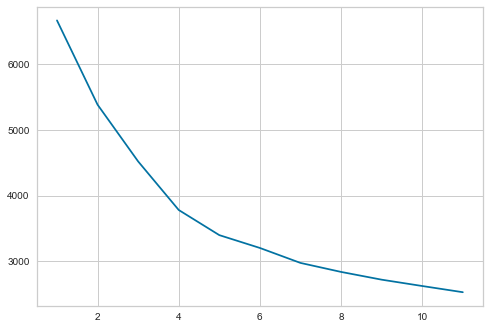

In [398]:
plt.plot(range(1,12),wcss)

In [399]:
Kmeansmodel = KMeans(n_clusters=4).fit(data)

In [400]:
clusters_km = Kmeansmodel.labels_

In [401]:
clusters_km

array([1, 1, 0, ..., 1, 1, 3])

In [402]:
Kmeansmodel.cluster_centers_

array([[ 0.0642133 , -0.10704984,  1.32174735, -0.19009468,  0.49570201,
         0.12320917,  0.28080229,  0.23209169,  0.24928367],
       [-0.98568115, -0.24334502, -0.55775221, -0.64834483,  0.48931116,
         0.09976247,  0.25415677,  0.28741093,  0.22327791],
       [ 0.01052448,  0.76530294,  0.00689438,  2.29529094,  0.64516129,
         0.95483871,  0.17419355,  0.38709677,  0.23225806],
       [ 0.94656181,  0.05129949, -0.55095586, -0.03988833,  0.47699758,
         0.09927361,  0.2251816 ,  0.24697337,  0.26150121]])

### Silhouette Sample and Score

In [403]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [404]:
silhouette_score(data,clusters_km)

0.22085219865876082

In [405]:
Sil_Sample=silhouette_samples(data,clusters_km)

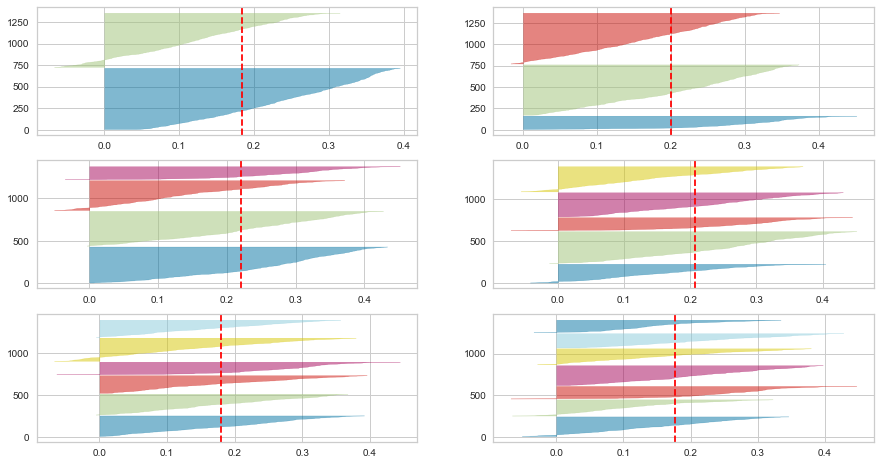

In [406]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5,6,7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data) 

In [407]:
X=df.copy()

In [408]:
X["clusters"]=clusters_km

In [409]:
X.groupby("clusters").agg({"charges":"mean","region":mode,"smoker":mode,"children":"mean","sex":mode,"age":"mean","Clusters":"count"})

,charges,region,smoker,children,sex,age,Clusters
clusters,,,,,,,
0,10969.233994,"([northwest], [98])","([no], [306])",2.687679,"([female], [176])",40.108883,349
1,5421.893724,"([southeast], [121])","([no], [379])",0.422803,"([female], [215])",25.363420,421
2,41056.032246,"([southeast], [60])","([yes], [148])",1.103226,"([male], [100])",39.354839,155
3,12787.554651,"([northeast], [110])","([no], [372])",0.430993,"([female], [216])",52.501211,413


### From K-means and Agglomerative clustering, it can be concluded that having 4 clusters would make maximum sense